In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
!git clone https://github.com/taehojo/data.git

fatal: destination path 'data' already exists and is not an empty directory.


In [3]:
df=pd.read_csv('./data/wine.csv',header=None)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [5]:
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [7]:
model=Sequential()
model.add(Dense(30,input_dim=12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
history = model.fit(X_train,y_train,epochs=50,batch_size=500,validation_split=0.25)

Epoch 1/50
8/8 [==============================] - 1s 50ms/step - loss: 0.7039 - accuracy: 0.7508 - val_loss: 0.6300 - val_accuracy: 0.7515
Epoch 2/50
8/8 [==============================] - 0s 11ms/step - loss: 0.5417 - accuracy: 0.7544 - val_loss: 0.4861 - val_accuracy: 0.7515
Epoch 3/50
8/8 [==============================] - 0s 11ms/step - loss: 0.4340 - accuracy: 0.7583 - val_loss: 0.4111 - val_accuracy: 0.7562
Epoch 4/50
8/8 [==============================] - 0s 12ms/step - loss: 0.3824 - accuracy: 0.7711 - val_loss: 0.3907 - val_accuracy: 0.7862
Epoch 5/50
8/8 [==============================] - 0s 11ms/step - loss: 0.3672 - accuracy: 0.8016 - val_loss: 0.3780 - val_accuracy: 0.8146
Epoch 6/50
8/8 [==============================] - 0s 15ms/step - loss: 0.3531 - accuracy: 0.8227 - val_loss: 0.3666 - val_accuracy: 0.8346
Epoch 7/50
8/8 [==============================] - 0s 13ms/step - loss: 0.3411 - accuracy: 0.8445 - val_loss: 0.3532 - val_accuracy: 0.8469
Epoch 8/50
8/8 [===========

In [10]:
score =model.evaluate(X_test,y_test)
print(score[1])

41/41 [==============================] - 0s 3ms/step - loss: 0.1223 - accuracy: 0.9569
0.9569230675697327


In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint
modelpath = '{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath,verbose=1)

In [12]:
history = model.fit(X_train,y_train,epochs=50,batch_size=500,
                    validation_split=0.25,verbose=0,callbacks=[checkpointer])


Epoch 1: saving model to 01-0.9477.hdf5

Epoch 2: saving model to 02-0.9485.hdf5

Epoch 3: saving model to 03-0.9508.hdf5

Epoch 4: saving model to 04-0.9515.hdf5

Epoch 5: saving model to 05-0.9508.hdf5

Epoch 6: saving model to 06-0.9523.hdf5

Epoch 7: saving model to 07-0.9508.hdf5

Epoch 8: saving model to 08-0.9554.hdf5

Epoch 9: saving model to 09-0.9569.hdf5

Epoch 10: saving model to 10-0.9562.hdf5

Epoch 11: saving model to 11-0.9592.hdf5

Epoch 12: saving model to 12-0.9508.hdf5

Epoch 13: saving model to 13-0.9585.hdf5

Epoch 14: saving model to 14-0.9569.hdf5

Epoch 15: saving model to 15-0.9577.hdf5

Epoch 16: saving model to 16-0.9592.hdf5

Epoch 17: saving model to 17-0.9600.hdf5

Epoch 18: saving model to 18-0.9592.hdf5

Epoch 19: saving model to 19-0.9569.hdf5

Epoch 20: saving model to 20-0.9546.hdf5

Epoch 21: saving model to 21-0.9538.hdf5

Epoch 22: saving model to 22-0.9562.hdf5

Epoch 23: saving model to 23-0.9615.hdf5

Epoch 24: saving model to 24-0.9608.hdf5



In [13]:
score = model.evaluate(X_test,y_test)
print(score[1])

41/41 [==============================] - 0s 8ms/step - loss: 0.0799 - accuracy: 0.9746
0.9746153950691223


In [14]:
history = model.fit(X_train,y_train,epochs=2000,batch_size=500,validation_split=0.25)

Epoch 1/2000
8/8 [==============================] - 0s 38ms/step - loss: 0.0758 - accuracy: 0.9766 - val_loss: 0.1082 - val_accuracy: 0.9677
Epoch 2/2000
8/8 [==============================] - 0s 24ms/step - loss: 0.0782 - accuracy: 0.9754 - val_loss: 0.1080 - val_accuracy: 0.9677
Epoch 3/2000
8/8 [==============================] - 0s 23ms/step - loss: 0.0758 - accuracy: 0.9749 - val_loss: 0.1076 - val_accuracy: 0.9677
Epoch 4/2000
8/8 [==============================] - 0s 23ms/step - loss: 0.0743 - accuracy: 0.9751 - val_loss: 0.1135 - val_accuracy: 0.9669
Epoch 5/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0755 - accuracy: 0.9766 - val_loss: 0.1079 - val_accuracy: 0.9708
Epoch 6/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.0742 - accuracy: 0.9754 - val_loss: 0.1062 - val_accuracy: 0.9685
Epoch 7/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0755 - accuracy: 0.9769 - val_loss: 0.1100 - val_accuracy: 0.9662
Epoch 8/2000


In [15]:
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.075836,0.976649,0.108163,0.967692
1,0.078166,0.975366,0.108028,0.967692
2,0.075818,0.974852,0.107640,0.967692
3,0.074343,0.975109,0.113502,0.966923
4,0.075495,0.976649,0.107928,0.970769
...,...,...,...,...
1995,0.025801,0.993072,0.094835,0.983077
1996,0.030899,0.990249,0.094977,0.983077
1997,0.027780,0.991275,0.097453,0.983077
1998,0.025261,0.991532,0.092760,0.980769


In [16]:
y_vloss=hist_df['val_loss']
y_loss = hist_df['loss']

In [17]:
import matplotlib.pyplot as plt
import numpy as np

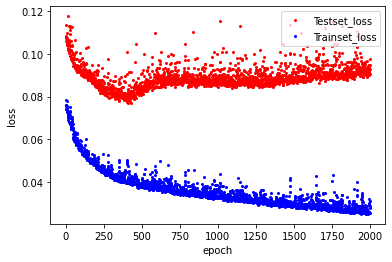

In [18]:
x_len = np.arange(len(y_loss))
plt.plot(x_len,y_vloss,'o',c='red',markersize=2,label='Testset_loss')
plt.plot(x_len,y_loss,'o',c='blue',markersize=2,label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=20)

In [22]:
modelpath = 'CH14-4-bestmodel.hdf5'

In [23]:
checkpointer = ModelCheckpoint(filepath=modelpath,moniter='val_loss',verbose=0,
                               save_best_only=True)

In [27]:
model=Sequential()
model.add(Dense(30,input_dim=12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(X_train,y_train,epochs=2000,batch_size=500,validation_split=0.25,
                    verbose=1,callbacks=[early_stopping_callback,checkpointer])

Epoch 1/2000
8/8 [==============================] - 1s 29ms/step - loss: 17.9410 - accuracy: 0.2456 - val_loss: 13.0326 - val_accuracy: 0.2469
Epoch 2/2000
8/8 [==============================] - 0s 7ms/step - loss: 9.8419 - accuracy: 0.2456 - val_loss: 5.4592 - val_accuracy: 0.2469
Epoch 3/2000
8/8 [==============================] - 0s 9ms/step - loss: 2.7916 - accuracy: 0.3282 - val_loss: 0.4952 - val_accuracy: 0.7446
Epoch 4/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.3170 - accuracy: 0.8822 - val_loss: 0.3257 - val_accuracy: 0.8923
Epoch 5/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.3283 - accuracy: 0.8902 - val_loss: 0.3846 - val_accuracy: 0.8777
Epoch 6/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.3562 - accuracy: 0.8853 - val_loss: 0.3805 - val_accuracy: 0.8846
Epoch 7/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.3358 - accuracy: 0.8963 - val_loss: 0.3473 - val_accuracy: 0.8931
Epoch 8/2000
8/8

In [29]:
score = model.evaluate(X_test,y_test)
print(score[1])

41/41 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9838
0.983846127986908
